In [1]:
import librosa as lb
from librosa.display import waveplot
from librosa.display import specshow

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt

In [2]:
dis_cat = ['Asthma', 'Bronchiectasis', 'Bronchiolitis', 'COPD', 'Healthy', 'LRTI', 'Pneumonia', 'URTI']
train_loc = '../data/Respiratory_Files/train_test_split/train/'
test_loc = '../data/Respiratory_Files/train_test_split/val/'

In [3]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory=train_loc, target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory=test_loc, target_size=(224,224))

Found 732 images belonging to 8 classes.
Found 188 images belonging to 8 classes.


In [10]:
vgg16 = VGG16(weights='imagenet')
vgg16.summary()

x_v16  = vgg16.get_layer('fc2').output
prediction_v16 = Dense(8, activation='softmax', name='predictions')(x_v16)

v16_model = Model(inputs=vgg16.input, outputs=prediction_v16)

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [11]:
for layer in v16_model.layers:
    layer.trainable = False

for layer in v16_model.layers[-20:]:
    layer.trainable = True

In [12]:
v16_opt = Adam(lr=0.00001)
v16_model.compile(optimizer=v16_opt, loss=categorical_crossentropy, metrics=['accuracy'])
v16_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [13]:
v16_checkpoint = ModelCheckpoint("vgg16_res.h5", monitor='val_accuracy', verbose=1, 
                                 save_best_only=True, save_weights_only=False, mode='auto')
v16_early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')

In [ ]:
v16_hist = v16_model.fit_generator(steps_per_epoch=5,generator=traindata, validation_data= testdata, 
                               validation_steps=5,epochs=50,callbacks=[v16_checkpoint,v16_early])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 5 steps, validate for 5 steps
Epoch 1/50
3/5 [=================>............] - ETA: 56s - loss: 2.0055 - accuracy: 0.5625   

In [ ]:
plt.plot(v16_hist.history['loss'], label='train')
plt.plot(v16_hist.history['val_loss'], label='val')
plt.title('VGG16: Loss and Validation Loss (0.00001 = Adam LR)')
plt.legend();
plt.show()

plt.plot(v16_hist.history['accuracy'], label='train')
plt.plot(v16_hist.history['val_accuracy'], label='val')
plt.title('VGG16: Accuracy and Validation Accuracy (0.00001 = Adam LR)')
plt.legend();
plt.show()

## ----------------------------
### 24 bit audio model training starts here

In [2]:
n_dis_cat = ['Asthma', 'BronchialDeformity', 'COPD', 'Healthy', 'Pneumonia', 'RTI']
n_train_loc = '../data/Respiratory_Files/New_Audio/train/'
n_test_loc = '../data/Respiratory_Files/New_Audio/val/'

In [5]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory=n_train_loc, target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory=n_test_loc, target_size=(224,224))

Found 734 images belonging to 6 classes.
Found 186 images belonging to 6 classes.


In [11]:
vgg16 = VGG16(weights='imagenet')
vgg16.summary()

x_v16  = vgg16.get_layer('fc2').output
prediction_v16 = Dense(6, activation='softmax', name='predictions')(x_v16)

v16_model = Model(inputs=vgg16.input, outputs=prediction_v16)

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [12]:
for layer in v16_model.layers:
    layer.trainable = False

for layer in v16_model.layers[-20:]:
    layer.trainable = True

In [13]:
v16_opt = Adam(lr=0.00001)
v16_model.compile(optimizer=v16_opt, loss=categorical_crossentropy, metrics=['accuracy'])
v16_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [14]:
v16_checkpoint = ModelCheckpoint("vgg16_res.h5", monitor='val_accuracy', verbose=1, 
                                 save_best_only=True, save_weights_only=False, mode='auto')
v16_early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')

In [15]:
v16_hist = v16_model.fit_generator(steps_per_epoch=5,generator=traindata, validation_data= testdata, 
                               validation_steps=5,epochs=50,callbacks=[v16_checkpoint,v16_early])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 5 steps, validate for 5 steps
Epoch 1/50
4/5 [=======================>......] - ETA: 27s - loss: 1.2565 - accuracy: 0.6719
Epoch 00001: val_accuracy improved from -inf to 0.84375, saving model to vgg16_res.h5
5/5 [==============================] - 181s 36s/step - loss: 1.0799 - accuracy: 0.7188 - val_loss: 0.5422 - val_accuracy: 0.8438
Epoch 2/50
4/5 [=======================>......] - ETA: 25s - loss: 0.4040 - accuracy: 0.8516
Epoch 00002: val_accuracy improved from 0.84375 to 0.88750, saving model to vgg16_res.h5
5/5 [==============================] - 170s 34s/step - loss: 0.3888 - accuracy: 0.8438 - val_loss: 0.3807 - val_accuracy: 0.8875
Epoch 3/50
4/5 [=======================>......] - ETA: 25s - loss: 0.3415 - accuracy: 0.8672
Epoch 00003: val_accuracy did not improve from 0.88750
5/5 [==============================] - 167s 33s/step - loss: 0.3769 - accuracy: 0.8625 - val_loss: 0.3686 - val_accuracy: 0.8500
Epoch 4/50
4/5

Epoch 29/50
4/5 [=======================>......] - ETA: 25s - loss: 0.0276 - accuracy: 0.9844
Epoch 00029: val_accuracy did not improve from 0.93125
5/5 [==============================] - 169s 34s/step - loss: 0.0246 - accuracy: 0.9875 - val_loss: 0.2996 - val_accuracy: 0.9187
Epoch 30/50
4/5 [=======================>......] - ETA: 25s - loss: 0.0271 - accuracy: 0.9921
Epoch 00030: val_accuracy did not improve from 0.93125
5/5 [==============================] - 168s 34s/step - loss: 0.0329 - accuracy: 0.9873 - val_loss: 0.3105 - val_accuracy: 0.9250
Epoch 31/50
4/5 [=======================>......] - ETA: 25s - loss: 0.0139 - accuracy: 1.0000
Epoch 00031: val_accuracy did not improve from 0.93125
5/5 [==============================] - 171s 34s/step - loss: 0.0151 - accuracy: 1.0000 - val_loss: 0.3226 - val_accuracy: 0.9000
Epoch 32/50
4/5 [=======================>......] - ETA: 25s - loss: 0.0233 - accuracy: 1.0000
Epoch 00032: val_accuracy did not improve from 0.93125
5/5 [============

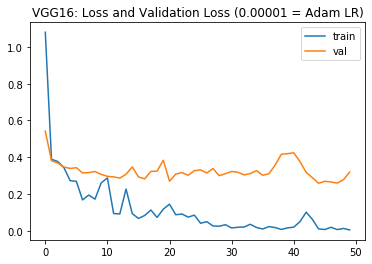

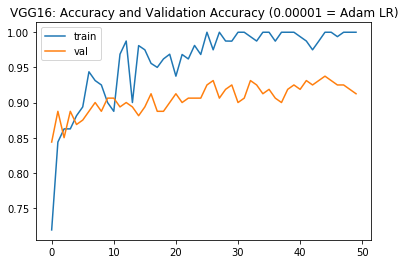

In [16]:
plt.plot(v16_hist.history['loss'], label='train')
plt.plot(v16_hist.history['val_loss'], label='val')
plt.title('VGG16: Loss and Validation Loss (0.00001 = Adam LR)')
plt.legend();
plt.show()

plt.plot(v16_hist.history['accuracy'], label='train')
plt.plot(v16_hist.history['val_accuracy'], label='val')
plt.title('VGG16: Accuracy and Validation Accuracy (0.00001 = Adam LR)')
plt.legend();
plt.show()